In [2]:
import os
import glob
import pydicom
import nibabel as nib
import pandas as pd
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2

from tqdm import tqdm

from PIL import Image

import sys

sys.path.append("..")

from utils.dcm_utils import *
from utils.nii_utils import *
from utils.train_utils import *
from utils.xray_utils import *

%load_ext autoreload
%autoreload 2

In [4]:
DATA_DIR = "/Volumes/SSD970/"
DATASET_DIR = "../../dataset/"
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, "train_images")
XRAY_IMAGE_DIR = os.path.join(DATA_DIR, "xray_images")

df = pd.read_csv(os.path.join(DATA_DIR, 'train_bounding_boxes.csv'))
df = df.set_index("StudyInstanceUID")
df.head()

,x,y,width,height,slice_number
StudyInstanceUID,,,,,
1.2.826.0.1.3680043.10051,219.27715,216.71419,17.30440,20.38517,133
1.2.826.0.1.3680043.10051,221.56460,216.71419,17.87844,25.24362,134
1.2.826.0.1.3680043.10051,216.82151,221.62546,27.00959,26.37454,135
1.2.826.0.1.3680043.10051,214.49455,215.48637,27.92726,37.51363,136
1.2.826.0.1.3680043.10051,214.00000,215.48637,27.00000,43.51363,137


In [50]:
UID = "1.2.826.0.1.3680043.53"

imgs, image_positions, image_orientations, pixel_spacings, slice_thicknesses, is_flip = read_patient_dcm(os.path.join(TRAIN_IMAGE_DIR, UID))
imgs = normalize_hu(imgs)
imgs.shape

226
(226, 3)


(226, 512, 512)

In [51]:
bboxes = df.loc[UID]
len(bboxes)

15

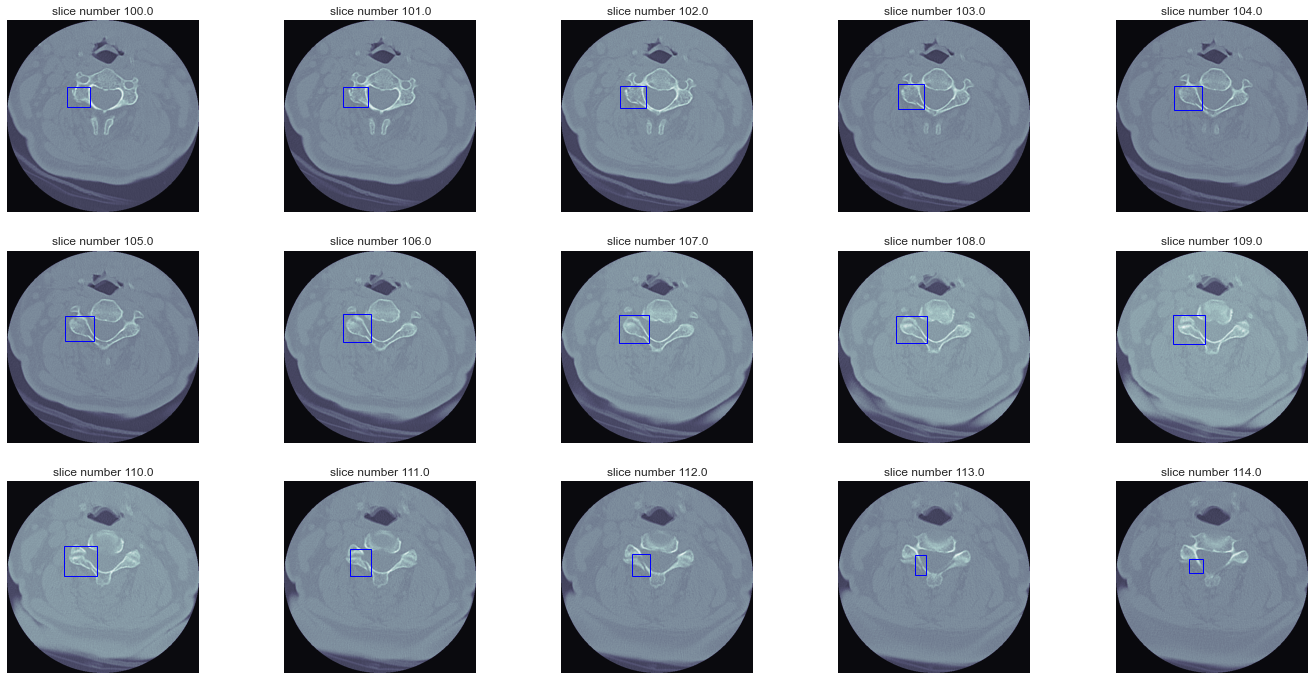

In [52]:
ncol = 5
_, axs = plt.subplots(int(np.round(float(len(bboxes)) / ncol)), ncol, figsize=(24, 12))

axs = axs.flatten()


for i in range(len(axs)):
    bbox = bboxes.iloc[i]
    # print(f'slice number {bbox["slice_number"]}')
    axs[i].imshow(imgs[int(bbox["slice_number"]), :, :], cmap='bone')
    axs[i].axis("off")

    x, y, width, height = bbox["x"], bbox["y"], bbox["width"], bbox["height"]
    rect = patches.Rectangle((x, y), width, height, fill=False, edgecolor="blue")
    axs[i].add_patch(rect)
    axs[i].set_title(f'slice number {bbox["slice_number"]}')